# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Advertising.csv', index_col=0)
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [2]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [3]:
X = np.array(df.drop(columns='sales').values)
y = np.array(df.sales.values)

print(f"X: {X}")
print(f"y: {y}")

X: [[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]
 [ 66.1   5.8  24.2]
 [214.7  24.    4. ]
 [ 23.8  35.1  65.9]
 [ 97.5   7.6   7.2]
 [204.1  32.9  46. ]
 [195.4  47.7  52.9]
 [ 67.8  36.6 114. ]
 [281.4  39.6  55.8]
 [ 69.2  20.5  18.3]
 [147.3  23.9  19.1]
 [218.4  27.7  53.4]
 [237.4   5.1  23.5]
 [ 13.2  15.9  49.6]
 [228.3  16.9  26.2]
 [ 62.3  12.6  18.3]
 [262.9   3.5  19.5]
 [142.9  29.3  12.6]
 [240.1  16.7  22.9]
 [248.8  27.1  22.9]
 [ 70.6  16.   40.8]
 [292.9  28.3  43.2]
 [112.9  17.4  38.6]
 [ 97.2   1.5  30. ]
 [265.6  20.    0.3]
 [ 95.7   1.4   7.4]
 [290.7   4.1   8.5]
 [266.9  43.8   5. ]
 [ 74.7  49.4  45.7]
 [ 43.1  26.7  35.1]
 [228.   37.7  32. ]
 [202.5  22.3  31.6]
 [177.   33.4  38.7]
 [293.6  27.7   1.8]
 [206.9   8.4  26.4]
 [ 25.1  25.7  43.3]
 [175.1  22.5  31.5]
 [ 89.7   9.9  35.7]
 [239.9  4

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [4]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [5]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм:

<a href="https://ibb.co/Th3BQFn"><img src="https://i.ibb.co/DK2DBS6/zascas.jpg" alt="zascas" border="0"></a>

Примечание: 1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [6]:
def coord_desc(X, y):
    p = X.shape[1]
    w = np.zeros(p)
    for i in range(1000):
        for j in range(p):
             r = (y - X @ w) + X[:, j] * w[j]
             w[j] = X[:, j] @ r
    return w
    
coord_desc(X, y)

array([ 41.56217205, 110.13144155,  73.52860638,  -0.55006384])

Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [7]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[ 41.56217205 110.13144155  73.52860638  -0.55006384]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [8]:
df_norm = df.copy()
for col in df_norm.drop(columns=['sales']).columns:
    col_mean = df_norm[col].mean()
    col_std = df_norm[col].std()
    df_norm[col] = df_norm[col].apply(lambda x: (x - col_mean)/col_std)
X = np.array(df_norm.drop(columns='sales').values)
y = np.array(df_norm.sales.values)

**Добавим единичный столбец**

In [9]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [10]:
def mse_error(y, pred):
    n = np.size(y)
    s = 0
    for i in range(n):
        s += (y[i] - pred[i])**2
    return s/n

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [11]:
print(mse_error(y, np.array([y.mean() for i in range(np.size(y))])))

27.085743749999985


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [12]:
def lin_pred(X, w):
    return X @ w

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [13]:
def stoch_grad_step(X, y, w, train_ind, eta):
    return w - (2 * eta * (X[train_ind]*((w @ X[train_ind]) - y[train_ind]))) / X.shape[0]

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте основной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [14]:
import random #для случайного индекса

def stochastic_gradient_descent(X, y, w, eta, max_iter, tol):
    dist = float('inf')
    i = 0
    errors = []
    while dist > tol and max_iter > i:
        w_prev = w
        train_ind = random.randrange(0, X.shape[0])
        w = stoch_grad_step(X, y, w, train_ind, eta)
        dist = np.linalg.norm(w - w_prev)
        errors.append(mse_error(y, lin_pred(X,w)))
        i += 1
    return [w, errors]

w = np.zeros(X.shape[1])
ans = stochastic_gradient_descent(X, y, w, 0.5, 1000, 10**(-8))
print(ans[0], ans[1][-1])

[13.89178972  4.02176147  2.67018981  0.14512647] 2.8394910618096203


 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

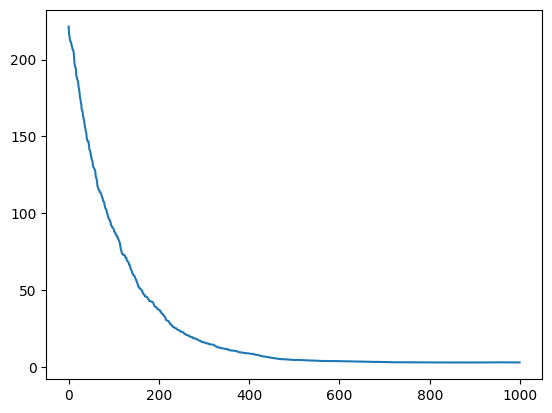

In [15]:
plt.plot(ans[1])

**Выведите вектор весов, к которому сошелся метод.**

In [16]:
print(f"w = {ans[0]}")

w = [13.89178972  4.02176147  2.67018981  0.14512647]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [17]:
print(f"MSE = {ans[1][-1]}")

MSE = 2.8394910618096203


In [18]:
# MSE Координатного спуска(лог регрессии, конечно, но веса совпали)
X = np.array(df.drop(columns='sales').values)
y = np.array(df.sales.values)
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
X = X / np.sqrt(np.sum(np.square(X), axis=0))

mse_error(y, lin_pred(X,model.coef_))

2.784126314510934

# Вывод:
* Веса в результате координатного спуска на 1000 итераций совпали с весами лог регрессии из sklearn.
* MSE Координатного спуска и Стохастического градиентного спуска практически одинаковые.
* График зависимости ошибки от номера итерации сходится.

п.с. Решил не комментировать код, потому что каждый фрагмент кода в соответствущей ячейке.

In [19]:
print("Координатный спуск:")
print(f"MSE: {mse_error(y, lin_pred(X,model.coef_))}")
print(f"w: {model.coef_}")
print(f"Количество итераций: {1000}")
print("\nСтохастический градиентный спуск:")
print(f"MSE: {ans[1][-1]}")
print(f"w: {ans[0]}")
print(f"Количество итераций: {1000}")

Координатный спуск:
MSE: 2.784126314510934
w: [ 41.56217205 110.13144155  73.52860638  -0.55006384]
Количество итераций: 1000

Стохастический градиентный спуск:
MSE: 2.8394910618096203
w: [13.89178972  4.02176147  2.67018981  0.14512647]
Количество итераций: 1000
